<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

df=pd.read_csv('/content/M2SLMoneyStock.csv',index_col=0,parse_dates=True)
df.index.freq='MS'

sp=pd.read_csv('/content/PCEPersonalSpending.csv',index_col=0,parse_dates=True)
sp.index.freq='MS'

df.head()


,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [ ]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [ ]:
df=df.join(sp)

In [ ]:
df.shape

(252, 2)

<Axes: xlabel='Date'>

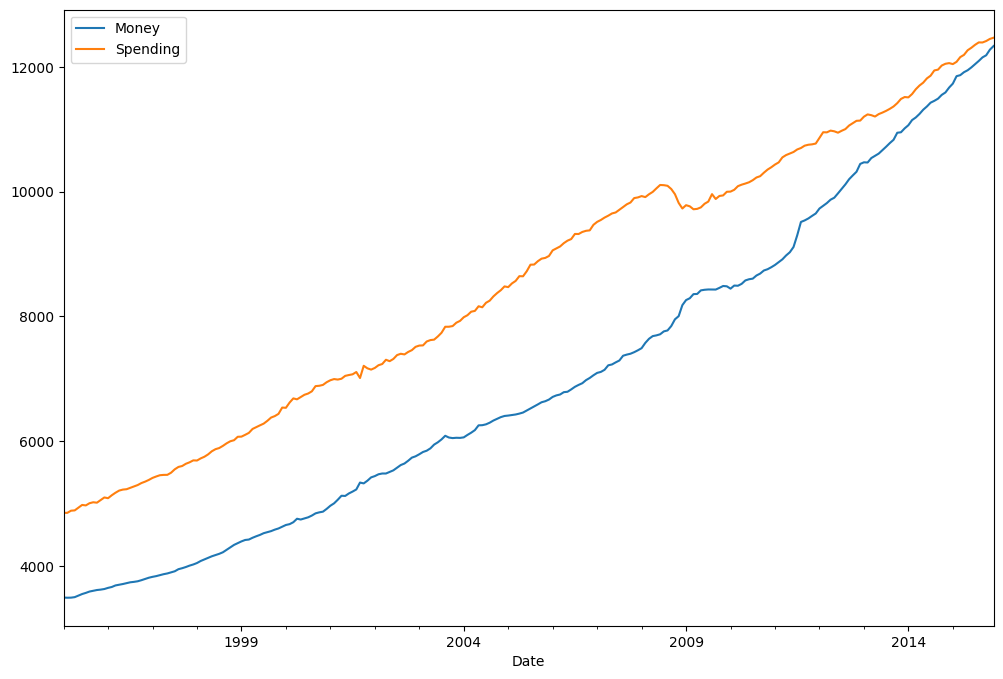

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
df_trans=df.diff()
df_trans=df.diff()

In [ ]:
df_trans.dropna(inplace=True)

In [ ]:
node=12
train=df_trans[:-node]
test=df_trans[-node:]

In [ ]:
model=VAR(train)

for p in range(1,10):
  result=model.fit(p)
  print('Lag Order =',p)
  print('AIC :',result.aic)
  print('BIC :',result.bic)
  print()

Lag Order = 1
AIC : 13.699704717655766
BIC : 13.787240953126476

Lag Order = 2
AIC : 13.681164092196841
BIC : 13.82749574372153

Lag Order = 3
AIC : 13.66700959392391
BIC : 13.872491141679665

Lag Order = 4
AIC : 13.63583331907169
BIC : 13.900822847814647

Lag Order = 5
AIC : 13.652192401902614
BIC : 13.97705165206445

Lag Order = 6
AIC : 13.653994177426354
BIC : 14.039088597137548

Lag Order = 7
AIC : 13.681032933334832
BIC : 14.12673173139513

Lag Order = 8
AIC : 13.701533857369267
BIC : 14.208210057186326

Lag Order = 9
AIC : 13.672296997525462
BIC : 14.240327492043207



In [ ]:
result=model.fit(5)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 31, Jul, 2024
Time:                     20:39:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.9771
Nobs:                     234.000    HQIC:                   13.7832
Log likelihood:          -2239.37    FPE:                    849439.
AIC:                      13.6522    Det(Omega_mle):         774875.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              14.763788         5.195637            2.842           0.004
L1.Money            0.287643         0.068575            4.195           0.000
L1.Spending        -0.089977         0.052457           -1.715      